In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/election2014/constituency_wise_results_2014.csv
/kaggle/input/election2019/constituency_wise_results_2019.csv


# **Importing Data**

In [59]:
import pandas as od
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
df1 = pd.read_csv('/kaggle/input/election2014/constituency_wise_results_2014.csv')
df2 = pd.read_csv('/kaggle/input/election2019/constituency_wise_results_2019.csv')

# **Data Audit**

In [61]:
df1.head()


,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282


In [62]:
df1.columns

Index(['state', 'pc_name', 'candidate', 'sex', 'age', 'category', 'party',
       'party_symbol', 'general_votes', 'postal_votes', 'total_votes',
       'total_electors'],
      dtype='object')

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           8355 non-null   object 
 1   pc_name         8355 non-null   object 
 2   candidate       8355 non-null   object 
 3   sex             7845 non-null   object 
 4   age             7845 non-null   float64
 5   category        7845 non-null   object 
 6   party           8355 non-null   object 
 7   party_symbol    8355 non-null   object 
 8   general_votes   8355 non-null   int64  
 9   postal_votes    8355 non-null   int64  
 10  total_votes     8355 non-null   int64  
 11  total_electors  8355 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 783.4+ KB


In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           8597 non-null   object 
 1   pc_name         8597 non-null   object 
 2   candidate       8597 non-null   object 
 3   sex             8054 non-null   object 
 4   age             8054 non-null   float64
 5   category        8054 non-null   object 
 6   party           8597 non-null   object 
 7   party_symbol    8054 non-null   object 
 8   general_votes   8597 non-null   int64  
 9   postal_votes    8597 non-null   int64  
 10  total_votes     8597 non-null   int64  
 11  total_electors  8597 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 806.1+ KB


In [65]:
df1.isnull().sum()

state               0
pc_name             0
candidate           0
sex               510
age               510
category          510
party               0
party_symbol        0
general_votes       0
postal_votes        0
total_votes         0
total_electors      0
dtype: int64

In [66]:
df2.isnull().sum()

state               0
pc_name             0
candidate           0
sex               543
age               543
category          543
party               0
party_symbol      543
general_votes       0
postal_votes        0
total_votes         0
total_electors      0
dtype: int64

In [67]:
df1.describe().round()

,age,general_votes,postal_votes,total_votes,total_electors
count,7845.0,8355.0,8355.0,8355.0,8355.0
mean,47.0,62133.0,107.0,62240.0,1574132.0
std,12.0,140262.0,436.0,140536.0,271180.0
min,25.0,105.0,0.0,105.0,49922.0
25%,38.0,1708.0,0.0,1708.0,1446478.0
50%,46.0,4350.0,1.0,4354.0,1578125.0
75%,56.0,14881.0,13.0,14886.0,1718414.0
max,93.0,859973.0,6792.0,863358.0,3183083.0


# **Exploratory Data Analysis**

In [68]:
df1['age'].fillna(df1['age'].mean(), inplace=True)

/tmp/ipykernel_33/2095864754.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['age'].fillna(df1['age'].mean(), inplace=True)


In [69]:
category_mode = df1['category'].mode()[0]
df1['category'].fillna(category_mode, inplace=True)
print(df1['category'].isnull().sum())

0


/tmp/ipykernel_33/1746663773.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['category'].fillna(category_mode, inplace=True)


In [70]:
sex_mode = df1['sex'].mode()[0]
df1['sex'].fillna(sex_mode, inplace=True)
print(df1['sex'].isnull().sum())


0


/tmp/ipykernel_33/2543794138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['sex'].fillna(sex_mode, inplace=True)


In [71]:
df2['age'].fillna(df2['age'].mean(), inplace=True)

/tmp/ipykernel_33/2459716890.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['age'].fillna(df2['age'].mean(), inplace=True)


In [72]:
category_mode = df2['category'].mode()[0]
df2['category'].fillna(category_mode, inplace=True)
print(df2['category'].isnull().sum())

0


/tmp/ipykernel_33/808732384.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['category'].fillna(category_mode, inplace=True)


In [73]:
sex_mode = df2['sex'].mode()[0]
df2['sex'].fillna(sex_mode, inplace=True)
print(df2['sex'].isnull().sum())

0


/tmp/ipykernel_33/1716735530.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['sex'].fillna(sex_mode, inplace=True)


In [74]:
df2.isnull().sum()

state               0
pc_name             0
candidate           0
sex                 0
age                 0
category            0
party               0
party_symbol      543
general_votes       0
postal_votes        0
total_votes         0
total_electors      0
dtype: int64

In [75]:
df1.dtypes

state              object
pc_name            object
candidate          object
sex                object
age               float64
category           object
party              object
party_symbol       object
general_votes       int64
postal_votes        int64
total_votes         int64
total_electors      int64
dtype: object

In [76]:
df2.dtypes

state              object
pc_name            object
candidate          object
sex                object
age               float64
category           object
party              object
party_symbol       object
general_votes       int64
postal_votes        int64
total_votes         int64
total_electors      int64
dtype: object

# **Comparative Analysis**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


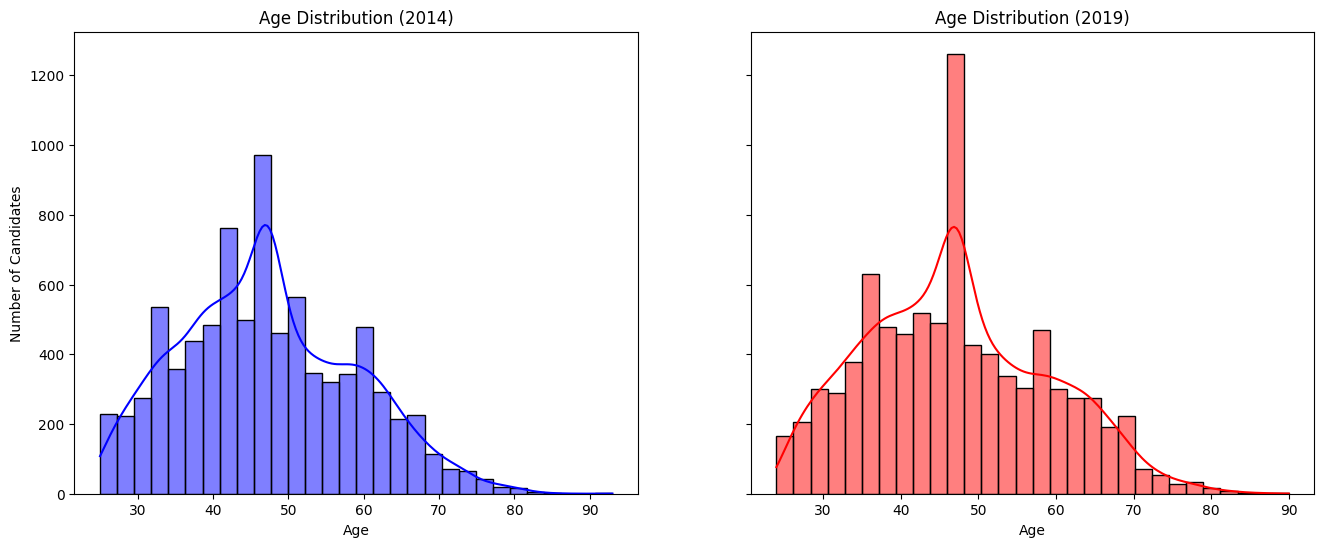

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.histplot(df1['age'].dropna(), bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Age Distribution (2014)')
sns.histplot(df2['age'].dropna(), bins=30, kde=True, color='red', ax=axes[1])
axes[1].set_title('Age Distribution (2019)')
axes[0].set_xlabel('Age')
axes[1].set_xlabel('Age')
axes[0].set_ylabel('Number of Candidates')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


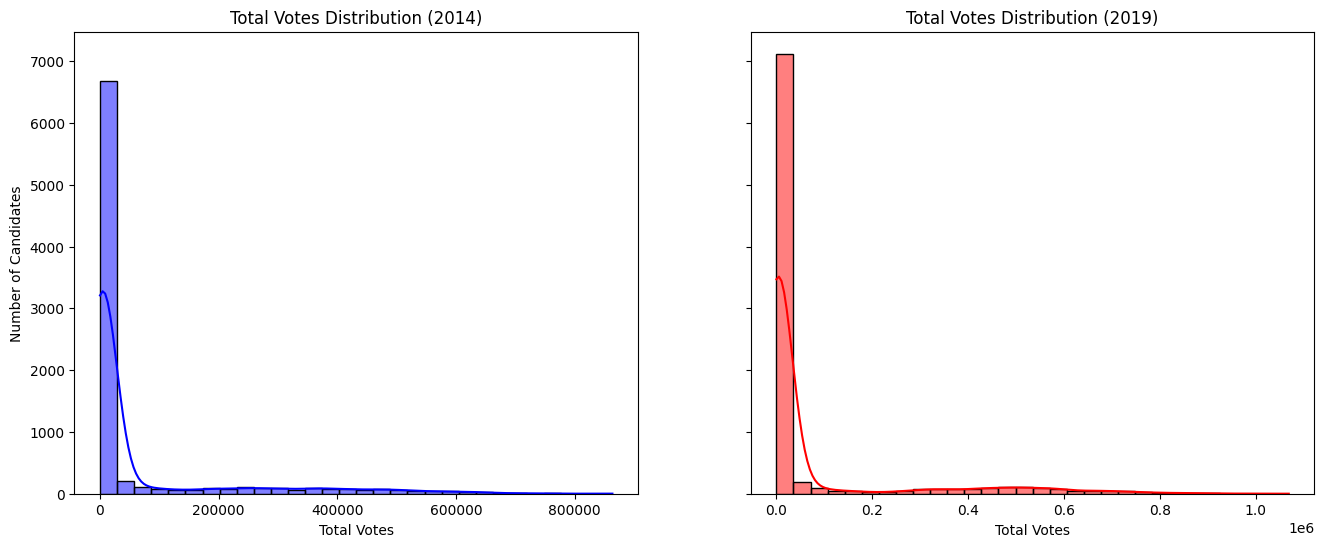

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.histplot(df1['total_votes'].dropna(), bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Total Votes Distribution (2014)')
sns.histplot(df2['total_votes'].dropna(), bins=30, kde=True, color='red', ax=axes[1])
axes[1].set_title('Total Votes Distribution (2019)')
axes[0].set_xlabel('Total Votes')
axes[1].set_xlabel('Total Votes')
axes[0].set_ylabel('Number of Candidates')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


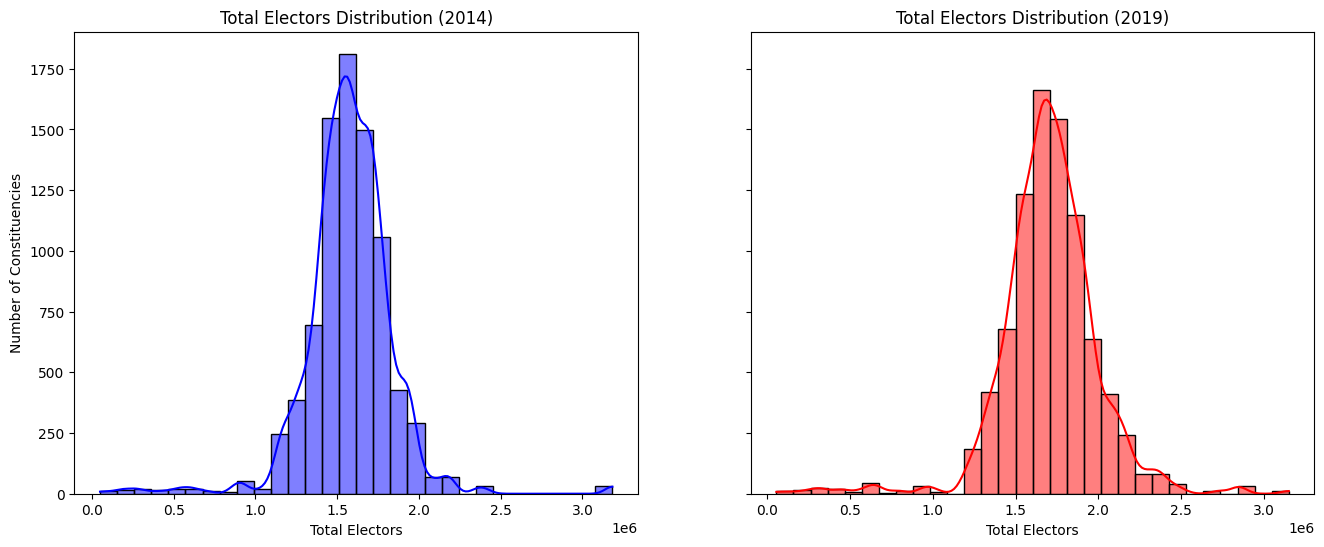

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.histplot(df1['total_electors'].dropna(), bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Total Electors Distribution (2014)')
sns.histplot(df2['total_electors'].dropna(), bins=30, kde=True, color='red', ax=axes[1])
axes[1].set_title('Total Electors Distribution (2019)')
axes[0].set_xlabel('Total Electors')
axes[1].set_xlabel('Total Electors')
axes[0].set_ylabel('Number of Constituencies')
plt.show()

In [80]:

winners_2014 = df1.loc[df1.groupby('pc_name')['total_votes'].idxmax()]

state_party_wins_2014 = winners_2014.groupby(['state', 'party']).size().reset_index(name='wins')

state_party_winner_2014 = state_party_wins_2014.loc[state_party_wins_2014.groupby('state')['wins'].idxmax()]


winners_2019 = df2.loc[df2.groupby('pc_name')['total_votes'].idxmax()]

state_party_wins_2019 = winners_2019.groupby(['state', 'party']).size().reset_index(name='wins')

state_party_winner_2019 = state_party_wins_2019.loc[state_party_wins_2019.groupby('state')['wins'].idxmax()]


print("State-wise winning parties for 2014:")
print(state_party_winner_2014[['state', 'party', 'wins']])

print("\nState-wise winning parties for 2019:")
print(state_party_winner_2019[['state', 'party', 'wins']])


State-wise winning parties for 2014:
                        state  party  wins
0   Andaman & Nicobar Islands    BJP     1
4              Andhra Pradesh    TDP    16
7           Arunachal Pradesh    BJP     1
10                      Assam    BJP     7
13                      Bihar    BJP    20
20                 Chandigarh    BJP     1
21       Dadra & Nagar Haveli    BJP     1
22                Daman & Diu    BJP     1
23                        Goa    BJP     2
24                    Gujarat    BJP    26
25                    Haryana    BJP     7
28           Himachal Pradesh    BJP     3
29            Jammu & Kashmir    BJP     3
31                  Jharkhand    BJP    12
33                  Karnataka    BJP    17
38                     Kerala    INC     8
43                Lakshadweep    NCP     1
44             Madhya Pradesh    BJP    27
46                Maharashtra    BJP    23
51                    Manipur    INC     2
52                  Meghalaya    INC     1
54               

In [81]:
# Calculate average voter turnout
average_turnout = df1['total_votes'].sum() / df1['total_electors'].sum() * 100
print(f"Average Voter Turnout in 2014: {average_turnout:.2f}%")

Average Voter Turnout in 2014: 3.95%


In [82]:
average_turnout2 = df2['total_votes'].sum() / df2['total_electors'].sum() * 100
print(f"Average Voter Turnout in 2019: {average_turnout2:.2f}%")

Average Voter Turnout in 2019: 4.19%


In [83]:
party_performance = df2.groupby('party')['total_votes'].sum().sort_values(ascending = False)
print("Performance of major parties in 2019")
print(party_performance)

Performance of major parties in 2019
party
BJP     229076879
INC     119495214
AITC     24929330
BSP      22246501
IND      16583326
          ...    
DKSP          346
ToP           330
CoAP          275
DJHP          273
MLJK          265
Name: total_votes, Length: 674, dtype: int64


In [84]:
#Listing top 5 and bottom 5 consituency in terms of voters turnout ratio

def calculate_turnout_ratio(df):
    df['turnout_ratio'] = df['total_votes'] / df['total_electors']
    return df

def get_top_bottom_5(df):
    df = df.sort_values(by='turnout_ratio', ascending=False)
    top_5 = df.head(5)
    bottom_5 = df.tail(5)

    return top_5, bottom_5
   

df1 = calculate_turnout_ratio(df1)
df2 = calculate_turnout_ratio(df2)


In [85]:
top_5_2014, bottom_5_2014 = get_top_bottom_5(df1)
top_5_2019, bottom_5_2019 = get_top_bottom_5(df2)



In [86]:
print("Top 5 Constituencies in 2014 by Voter Turnout Ratio:")
print(top_5_2014[['state', 'pc_name', 'turnout_ratio']])

print("\nBottom 5 Constituencies in 2014 by Voter Turnout Ratio:")
print(bottom_5_2014[['state', 'pc_name', 'turnout_ratio']])

print("\nTop 5 Constituencies in 2019 by Voter Turnout Ratio:")
print(top_5_2019[['state', 'pc_name', 'turnout_ratio']])

print("\nBottom 5 Constituencies in 2019 by Voter Turnout Ratio:")
print(bottom_5_2019[['state', 'pc_name', 'turnout_ratio']])

Top 5 Constituencies in 2014 by Voter Turnout Ratio:
         state       pc_name  turnout_ratio
4361  Nagaland      Nagaland       0.603034
5881   Tripura  Tripura East       0.547035
5868   Tripura  Tripura West       0.537958
1777   Gujarat      Vadodara       0.516055
1818   Gujarat         Surat       0.484083

Bottom 5 Constituencies in 2014 by Voter Turnout Ratio:
           state        pc_name  turnout_ratio
1950     Haryana          Hisar       0.000084
5048  Tamil Nadu  Chennai South       0.000078
5072  Tamil Nadu  Chennai South       0.000067
5057  Tamil Nadu  Chennai South       0.000065
5066  Tamil Nadu  Chennai South       0.000058

Top 5 Constituencies in 2019 by Voter Turnout Ratio:
                 state         pc_name  turnout_ratio
2505            Kerala         Wayanad       0.519510
3012    Madhya Pradesh     HOSHANGABAD       0.514569
1827  Himachal Pradesh          Kangra       0.508091
1841  Himachal Pradesh           Mandi       0.505040
2159         Karnata

In [87]:
def plot_turnout_bar_chart(top_5, bottom_5, year):
    fig, axs = plt.subplots(2, 1, figsize=(12, 12))
    
    # Plot for top 5
    axs[0].bar(top_5['pc_name'], top_5['turnout_ratio'], color='blue')
    axs[0].set_title(f'Top 5 Constituencies by Voter Turnout Ratio in {year}')
    axs[0].set_xlabel('Parliamentary Constituency')
    axs[0].set_ylabel('Voter Turnout Ratio')
    axs[0].tick_params(axis='x', rotation=45)
    
    # Plot for bottom 5
    axs[1].bar(bottom_5['pc_name'], bottom_5['turnout_ratio'], color='pink')
    axs[1].set_title(f'Bottom 5 Constituencies by Voter Turnout Ratio in {year}')
    axs[1].set_xlabel('Parliamentary Constituency')
    axs[1].set_ylabel('Voter Turnout Ratio')
    axs[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

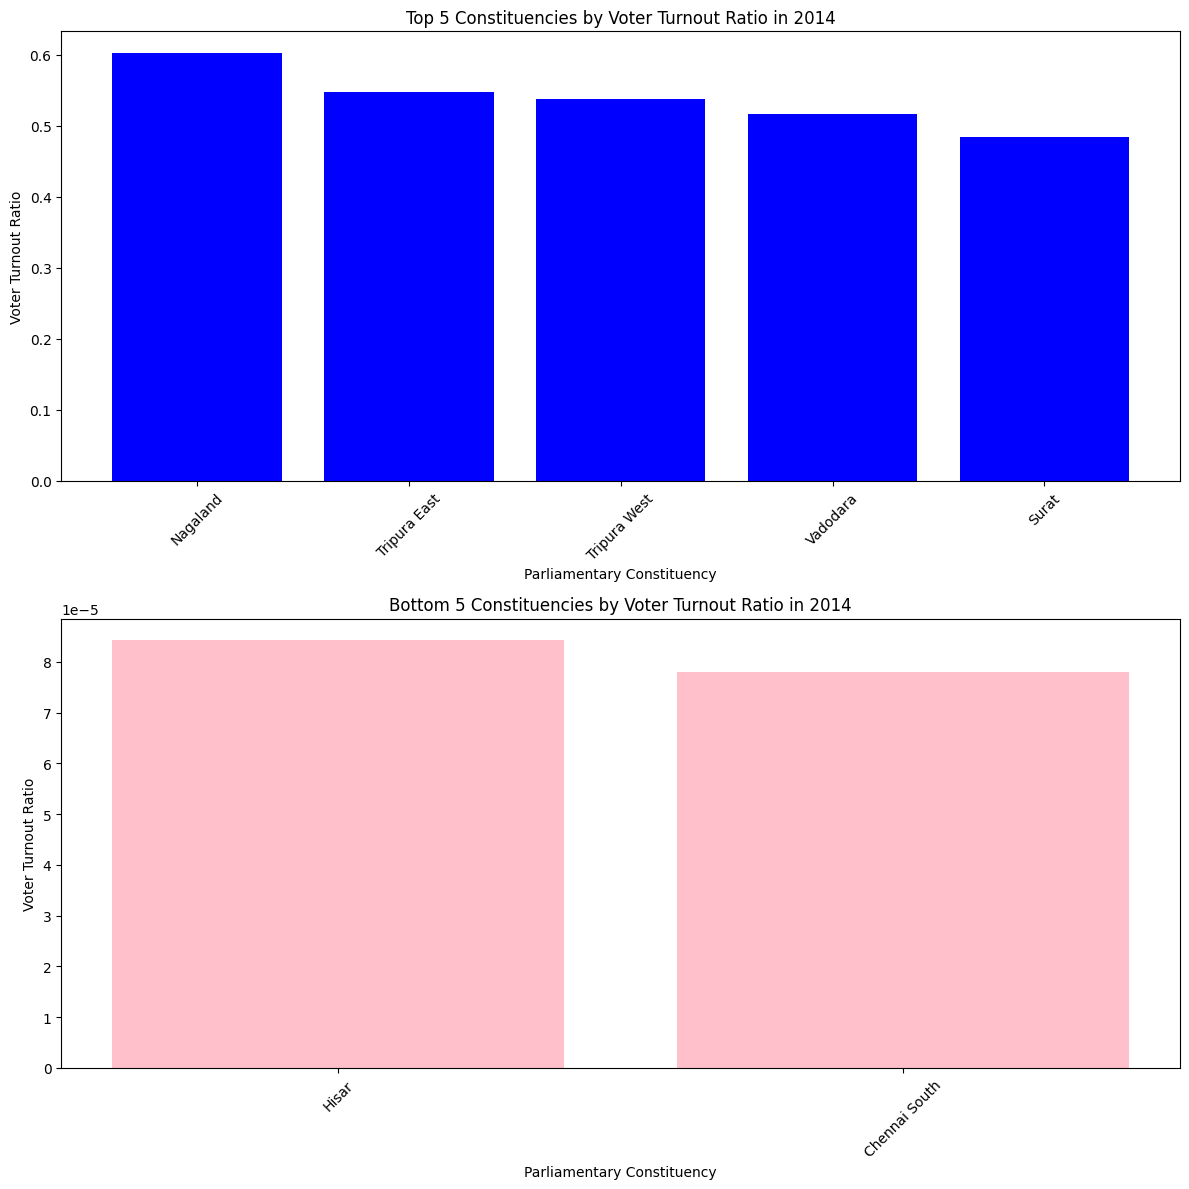

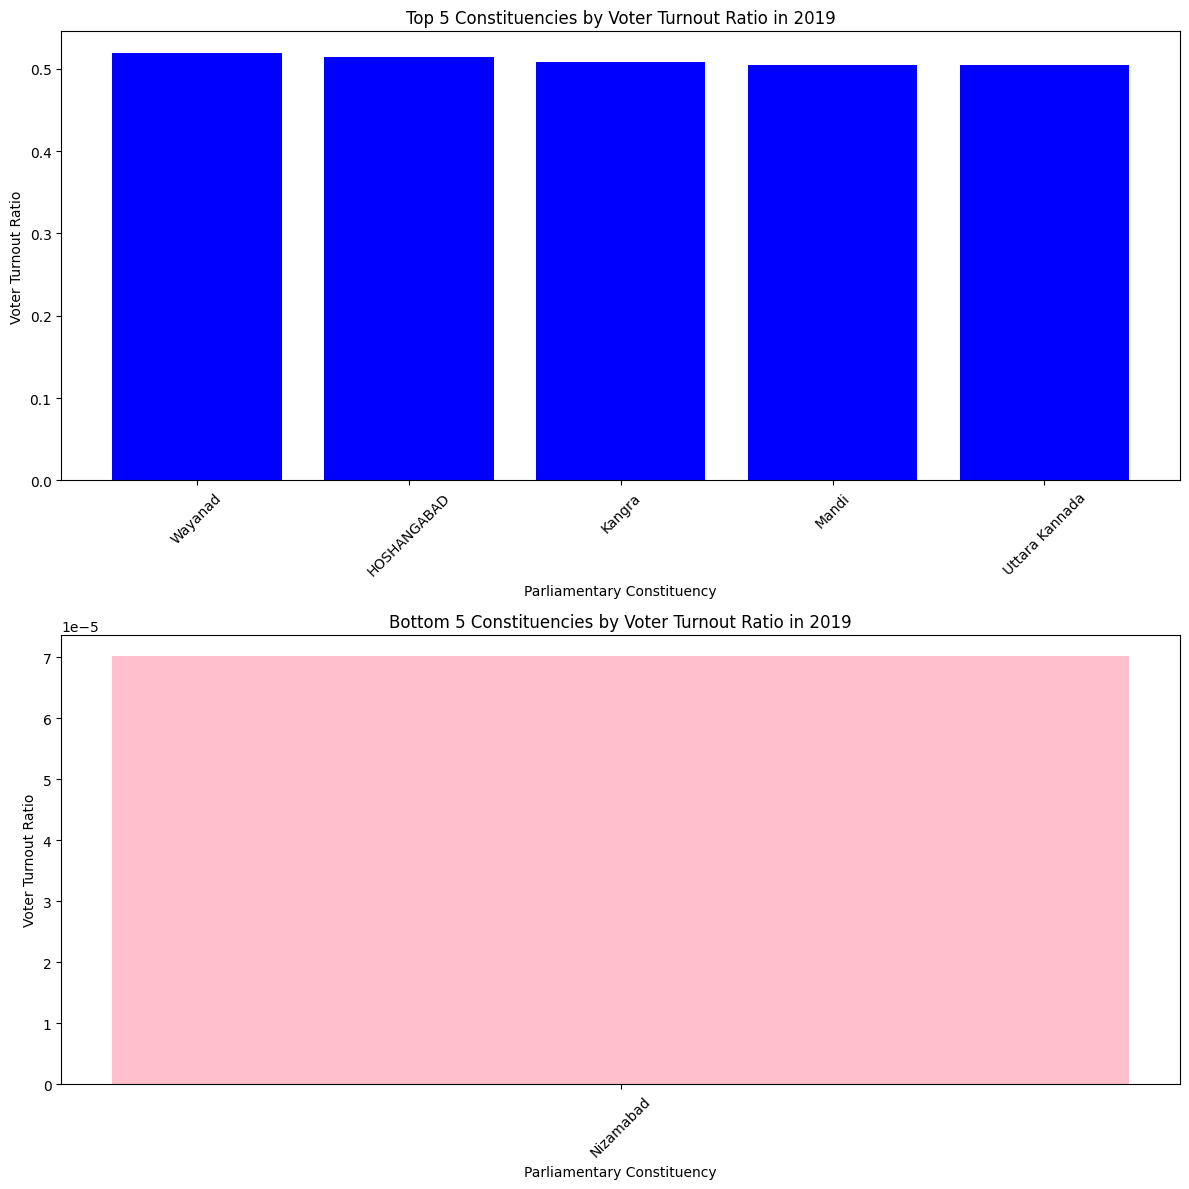

In [88]:
plot_turnout_bar_chart(top_5_2014, bottom_5_2014, 2014)
plot_turnout_bar_chart(top_5_2019, bottom_5_2019, 2019)

In [89]:
#Listing top 5/bottom 5 states in terms of voters turnout
def calculate_turnout_state_ratio(df):
    state_grouped = df.groupby('state').sum()
    state_grouped['turnout_ratio'] = state_grouped['total_votes'] / state_grouped['total_electors']
    return state_grouped.reset_index()

In [90]:
df_2014_states = calculate_turnout_state_ratio(df1)
df_2019_states = calculate_turnout_state_ratio(df2)

In [91]:
top_5_2014_states, bottom_5_2014_states = get_top_bottom_5(df_2014_states)
top_5_2019_states, bottom_5_2019_states = get_top_bottom_5(df_2019_states)

In [92]:
print("Top 5 states in 2014 by voter turnout ratio:")
print(top_5_2014_states[['state', 'turnout_ratio']])
print("\nBottom 5 states in 2014 by voter turnout ratio:")
print(bottom_5_2014_states[['state', 'turnout_ratio']])

print("\nTop 5 states in 2019 by voter turnout ratio:")
print(top_5_2019_states[['state', 'turnout_ratio']])
print("\nBottom 5 states in 2019 by voter turnout ratio:")
print(bottom_5_2019_states[['state', 'turnout_ratio']])

Top 5 states in 2014 by voter turnout ratio:
          state  turnout_ratio
23     Nagaland       0.219555
7   Daman & Diu       0.156014
21      Mizoram       0.154237
16  Lakshadweep       0.123733
27       Sikkim       0.119045

Bottom 5 states in 2014 by voter turnout ratio:
              state  turnout_ratio
12  Jammu & Kashmir       0.031723
18      Maharashtra       0.030336
10          Haryana       0.029932
22     NCT OF Delhi       0.029765
24       Puducherry       0.026484

Top 5 states in 2019 by voter turnout ratio:
                state  turnout_ratio
24           Nagaland       0.165822
8         Daman & Diu       0.143698
17        Lakshadweep       0.121683
21          Meghalaya       0.121504
2   Arunachal Pradesh       0.113428

Bottom 5 states in 2019 by voter turnout ratio:
              state  turnout_ratio
27           Punjab       0.029419
13  Jammu & Kashmir       0.027211
23     NCT OF Delhi       0.025292
31        Telangana       0.024050
5        Chandigar

In [93]:
#constituency which have elected the same part for two consecutive years 
merged_df = pd.merge(df1, df2, on=['state', 'pc_name', 'party'], suffixes=('_2014', '_2019'))
merged_df['percentage_votes_2019'] = (merged_df['total_votes_2019'] / merged_df['total_electors_2019']) * 100
merged_df_sorted = merged_df.sort_values(by='percentage_votes_2019', ascending=False)
result = merged_df_sorted[['state', 'pc_name', 'party', 'percentage_votes_2019']]
print(result)


                  state         pc_name party  percentage_votes_2019
7895             Kerala         Wayanad   INC              51.951012
9229     Madhya Pradesh     HOSHANGABAD   BJP              51.456884
5197   Himachal Pradesh          Kangra   BJP              50.809129
5220   Himachal Pradesh           Mandi   BJP              50.503956
6410          Karnataka  Uttara Kannada   BJP              50.497398
...                 ...             ...   ...                    ...
10502       Maharashtra         Nagpur    IND               0.007219
10437       Maharashtra         Nagpur    IND               0.007219
10398       Maharashtra         Nagpur    IND               0.007219
10593       Maharashtra         Nagpur    IND               0.007219
10372       Maharashtra         Nagpur    IND               0.007219

[28636 rows x 4 columns]


In [94]:
print(merged_df.columns)

Index(['state', 'pc_name', 'candidate_2014', 'sex_2014', 'age_2014',
       'category_2014', 'party', 'party_symbol_2014', 'general_votes_2014',
       'postal_votes_2014', 'total_votes_2014', 'total_electors_2014',
       'turnout_ratio_2014', 'candidate_2019', 'sex_2019', 'age_2019',
       'category_2019', 'party_symbol_2019', 'general_votes_2019',
       'postal_votes_2019', 'total_votes_2019', 'total_electors_2019',
       'turnout_ratio_2019', 'percentage_votes_2019'],
      dtype='object')


In [95]:
df1.rename(columns={'party': 'party_2014', 'total_votes': 'total_votes_2014', 'total_electors': 'total_electors_2014'}, inplace=True)
df2.rename(columns={'party': 'party_2019', 'total_votes': 'total_votes_2019', 'total_electors': 'total_electors_2019'}, inplace=True)

# Calculate vote percentages
df1['vote_percentage_2014'] = (df1['total_votes_2014'] / df1['total_electors_2014']) * 100
df2['vote_percentage_2019'] = (df2['total_votes_2019'] / df2['total_electors_2019']) * 100

# Merge datasets based on state and pc_name
merged_df = pd.merge(df1, df2, on=['state', 'pc_name'])

# Filter out constituencies where the same party won in both elections
merged_df_diff_party = merged_df[merged_df['party_2014'] != merged_df['party_2019']]

# Calculate the absolute difference in vote percentage
merged_df_diff_party['vote_percentage_difference'] = abs(merged_df_diff_party['vote_percentage_2014'] - merged_df_diff_party['vote_percentage_2019'])

# Sort by vote percentage difference and select the top 10
top_10_diff_party = merged_df_diff_party.sort_values(by='vote_percentage_difference', ascending=False).drop_duplicates(subset=['state', 'pc_name']).head(10)

# Select relevant columns for the result
result = top_10_diff_party[['state', 'pc_name', 'party_2014', 'vote_percentage_2014', 'party_2019', 'vote_percentage_2019', 'vote_percentage_difference']]

# Display the result
print(result)

                   state         pc_name party_2014  vote_percentage_2014  \
71304           Nagaland        Nagaland        NPF             60.303372   
102776           Tripura    Tripura East        CPM             54.703510   
102597           Tripura    Tripura West        CPM             53.795775   
41468             Kerala         Wayanad       AITC              0.059308   
23270            Gujarat        Vadodara        BJP             51.605516   
49045     Madhya Pradesh     HOSHANGABAD        GGP              0.333183   
30421   Himachal Pradesh          Kangra       BMUP              0.050612   
30609   Himachal Pradesh           Mandi       BMUP              0.078320   
35494          Karnataka  Uttara Kannada       BMUP              0.126844   
93479         Tamil Nadu           Karur        IND              0.033659   

       party_2019  vote_percentage_2019  vote_percentage_difference  
71304        NOTA              0.170048                   60.133324  
102776      

/tmp/ipykernel_33/607864796.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_diff_party['vote_percentage_difference'] = abs(merged_df_diff_party['vote_percentage_2014'] - merged_df_diff_party['vote_percentage_2019'])


In [96]:
# Top 5 constituency based on margin difference with runner in 2014 and 2019
def get_winner_runner_up(df, year):
    sorted_group = df.sort_values(by=f'total_votes_{year}', ascending=False)
    winner = sorted_group.iloc[0]
    runner_up = sorted_group.iloc[1]
    return pd.Series({f'winner_votes_{year}': winner[f'total_votes_{year}'], f'runner_up_votes_{year}': runner_up[f'total_votes_{year}'], f'margin_{year}': winner[f'total_votes_{year}'] - runner_up[f'total_votes_{year}']})

results_2014 = df1.groupby(['state', 'pc_name']).apply(lambda x: get_winner_runner_up(x, '2014')).reset_index()
results_2019 = df2.groupby(['state', 'pc_name']).apply(lambda x: get_winner_runner_up(x, '2019')).reset_index()


merged_results = pd.merge(results_2014, results_2019, on=['state', 'pc_name'])


merged_results['margin_difference'] = abs(merged_results['margin_2014'] - merged_results['margin_2019'])


top_5_margin_diff = merged_results.sort_values(by='margin_difference', ascending=False).head(5)


result = top_5_margin_diff[['state', 'pc_name', 'margin_2014', 'margin_2019', 'margin_difference']]


print(result)

/tmp/ipykernel_33/3345107898.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results_2014 = df1.groupby(['state', 'pc_name']).apply(lambda x: get_winner_runner_up(x, '2014')).reset_index()


            state                         pc_name  margin_2014  margin_2019  \
281  NCT OF Delhi  NORTH WEST DELHI                     106802       553897   
61          Bihar                       Madhubani        20535       454940   
333    Tamil Nadu                        Dindigul       127845       538972   
193        Kerala                         Wayanad        20870       431770   
350    Tamil Nadu                   Sriperumbudur       102646       507955   

     margin_difference  
281             447095  
61              434405  
333             411127  
193             410900  
350             405309  


/tmp/ipykernel_33/3345107898.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results_2019 = df2.groupby(['state', 'pc_name']).apply(lambda x: get_winner_runner_up(x, '2019')).reset_index()


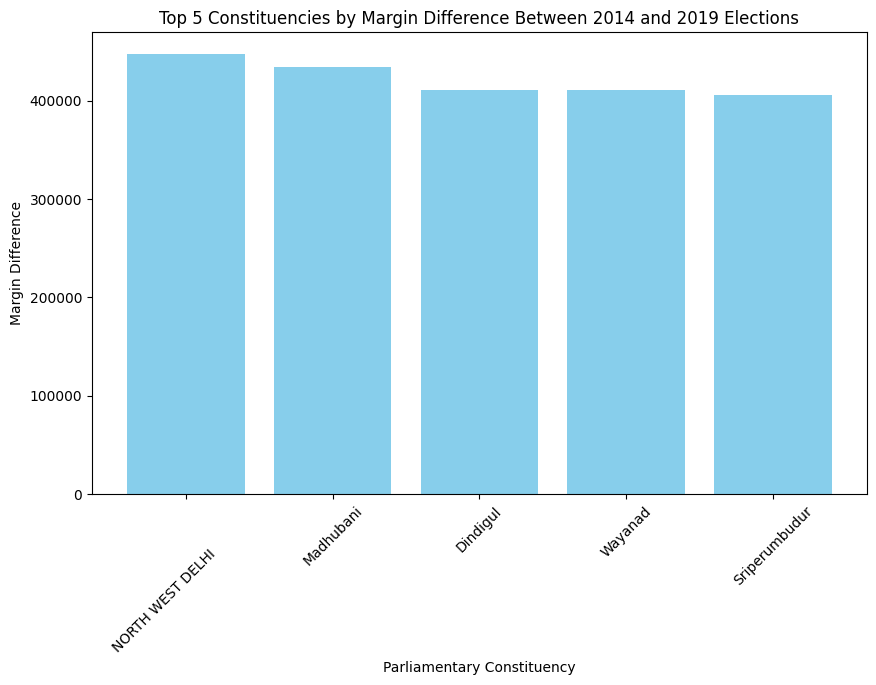

In [97]:
plt.figure(figsize=(10, 6))
plt.bar(result['pc_name'], result['margin_difference'], color='skyblue')
plt.xlabel('Parliamentary Constituency')
plt.ylabel('Margin Difference')
plt.title('Top 5 Constituencies by Margin Difference Between 2014 and 2019 Elections')
plt.xticks(rotation=45)
plt.show()

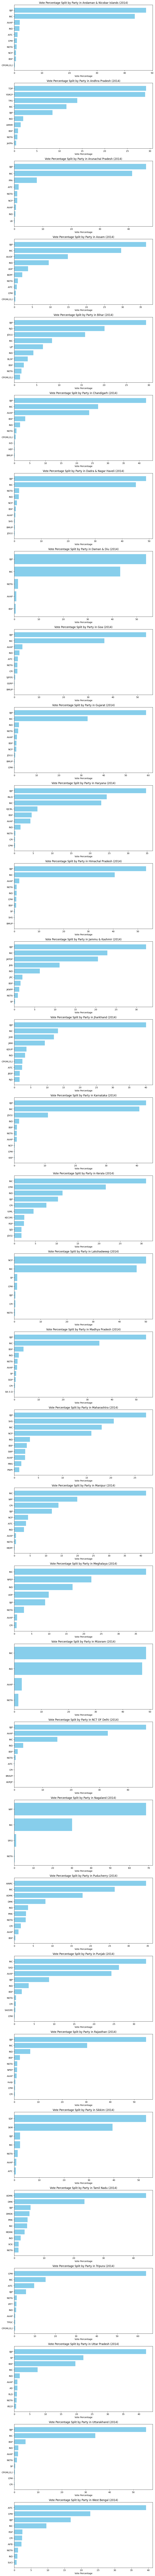

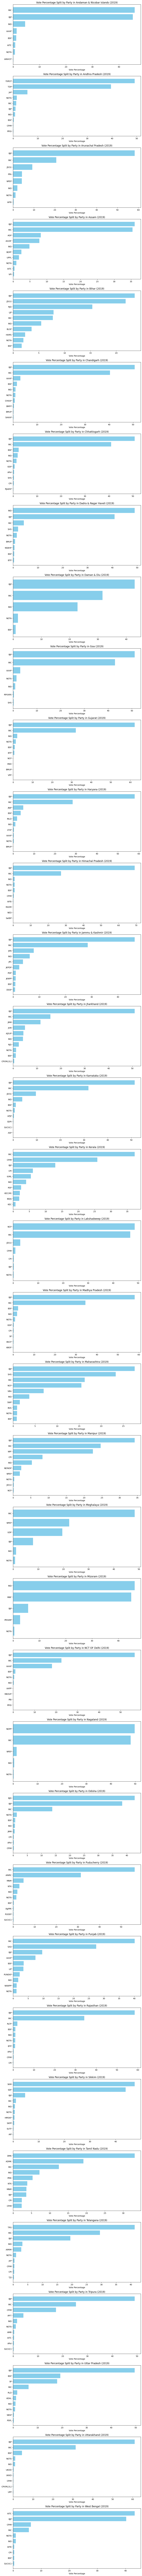

In [98]:
# Aggregate total votes by party and state for 2014
party_votes_state_2014 = df1.groupby(['state', 'party_2014'])['total_votes_2014'].sum().reset_index()
party_votes_state_2014['vote_percentage_2014'] = party_votes_state_2014.groupby('state')['total_votes_2014'].transform(lambda x: (x / x.sum()) * 100)

# Aggregate total votes by party and state for 2019
party_votes_state_2019 = df2.groupby(['state', 'party_2019'])['total_votes_2019'].sum().reset_index()
party_votes_state_2019['vote_percentage_2019'] = party_votes_state_2019.groupby('state')['total_votes_2019'].transform(lambda x: (x / x.sum()) * 100)

# Function to plot bar charts for each state
def plot_state_vote_distribution(party_votes_state, year, top_n=5):
    states = party_votes_state['state'].unique()
    num_states = len(states)
    
    fig, axs = plt.subplots(num_states, 1, figsize=(10, 5 * num_states))
    
    if num_states == 1:
        axs = [axs]
    
    for ax, state in zip(axs, states):
        state_data = party_votes_state[party_votes_state['state'] == state].sort_values(by=f'vote_percentage_{year}', ascending=False).head(top_n)
        ax.barh(state_data[f'party_{year}'], state_data[f'vote_percentage_{year}'], color='skyblue')
        ax.set_xlabel('Vote Percentage')
        ax.set_title(f'Vote Percentage Split by Party in {state} ({year})')
        ax.invert_yaxis()
    
    plt.tight_layout()
    plt.show()

# Plotting for 2014
plot_state_vote_distribution(party_votes_state_2014, '2014', top_n=10)

# Plotting for 2019
plot_state_vote_distribution(party_votes_state_2019, '2019', top_n=10)